# 1. Import the python's libraries

In [2]:
import pandas as pd 

# 2. The cleaning function.

In [3]:
#1. CREATE THE DATA CLEANING FUNCTION
def clean_and_charge (file_path, date_column):
    
    """Clean the raw datasets by: 
    - Removing duplicates
    - Handling date columns
    - Transforming data types"""
    
    # Extract filename from path for logging
    filename = file_path.split("/")[-1]
    print (f"Processing: {filename}...")
    
    # Load data
    df = pd.read_csv(file_path)
    
    # Convert date column to datetime
    df[date_column] = pd.to_datetime(df[date_column])

    # Remove duplicates
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        df.drop_duplicates(inplace=True)
        print(f"Removed {duplicates} duplicate rows.")
    print (f"Final dimensions: {df.shape}| Missing values {df.isnull().sum().sum()}")
    return df

#2. CONFIGURATION AND EXECUTION
#list of tuples: 
files_config =[
    ("../data/raw/dailyActivity_merged.csv", "ActivityDate"),
    ("../data/raw/hourlySteps_merged.csv", "ActivityHour"),
    ("../data/raw/minuteSleep_merged.csv", "date"),

]

processed_dfs = []

# Loop through files and process
for path, date_col in files_config:
    clean_df = clean_and_charge (path, date_col)
    processed_dfs.append(clean_df)

df_activity, df_hourly_steps, df_sleep = processed_dfs

#3. TRANSFORM SLEEP DATA TO DAILY SUMMARY
print ("Transforming sleep minutes to daily summary...")

df_sleep ["SleepDay"] = df_sleep["date"].dt.date
df_sleep["SleepDay"] = pd.to_datetime(df_sleep["SleepDay"])

daily_sleep_agg = df_sleep.groupby (["Id", "SleepDay"]).size().reset_index(name="TotalMinutesSleep")

df_activity.rename(columns={"ActivityDate": "SleepDay"}, inplace=True)

# 4. MERGE ACTIVITY AND SLEEP DATAFRAMES
df_merged = pd.merge(df_activity, daily_sleep_agg, on=["Id", "SleepDay"], how="left")
df_merged["TotalMinutesSleep"] = df_merged["TotalMinutesSleep"].fillna(0)

print ("/Processing complete. The dataframe is ready for analysis./")

Processing: dailyActivity_merged.csv...
Final dimensions: (457, 15)| Missing values 0
Processing: hourlySteps_merged.csv...


C:\Users\Samuel\AppData\Local\Temp\ipykernel_3628\18674617.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_column] = pd.to_datetime(df[date_column])


Final dimensions: (24084, 3)| Missing values 0
Processing: minuteSleep_merged.csv...
Removed 525 duplicate rows.
Final dimensions: (198034, 4)| Missing values 0
Transforming sleep minutes to daily summary...
/Processing complete. The dataframe is ready for analysis./


# 3. Data quality check

In [4]:
print ("FIRST 10 LINES")
print (df_merged.head(10))

FIRST 10 LINES
           Id   SleepDay  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366 2016-03-25       11004           7.11             7.11   
1  1503960366 2016-03-26       17609          11.55            11.55   
2  1503960366 2016-03-27       12736           8.53             8.53   
3  1503960366 2016-03-28       13231           8.93             8.93   
4  1503960366 2016-03-29       12041           7.85             7.85   
5  1503960366 2016-03-30       10970           7.16             7.16   
6  1503960366 2016-03-31       12256           7.86             7.86   
7  1503960366 2016-04-01       12262           7.87             7.87   
8  1503960366 2016-04-02       11248           7.25             7.25   
9  1503960366 2016-04-03       10016           6.37             6.37   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0           

In [5]:
print ("Latest 5 lines")
print (df_merged.tail(5))

Latest 5 lines
             Id   SleepDay  TotalSteps  TotalDistance  TrackerDistance  \
452  8877689391 2016-04-08       23014      20.389999        20.389999   
453  8877689391 2016-04-09       16470       8.070000         8.070000   
454  8877689391 2016-04-10       28497      27.530001        27.530001   
455  8877689391 2016-04-11       10622       8.060000         8.060000   
456  8877689391 2016-04-12        2350       1.780000         1.780000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
452                       0.0               11.10                      0.63   
453                       0.0                0.00                      0.02   
454                       0.0               21.92                      1.12   
455                       0.0                1.47                      0.15   
456                       0.0                0.00                      0.00   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinu

In [6]:
print ("COUNTING NULLS VALUES IN THE FINAL DATAFRAME")
print (df_merged.isnull().sum())

COUNTING NULLS VALUES IN THE FINAL DATAFRAME
Id                          0
SleepDay                    0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
TotalMinutesSleep           0
dtype: int64


In [7]:
print ("SEARHCH FOR DUPLICATES IN THE FINAL DATAFRAME")
print (df_merged.duplicated().sum())

SEARHCH FOR DUPLICATES IN THE FINAL DATAFRAME
0


In [8]:
print ("CHEKING STEPS PER HOUR")
print (df_hourly_steps.sort_values(by = ["Id", "ActivityHour"]).head(24))

CHEKING STEPS PER HOUR
            Id        ActivityHour  StepTotal
0   1503960366 2016-03-12 00:00:00          0
1   1503960366 2016-03-12 01:00:00          0
2   1503960366 2016-03-12 02:00:00          0
3   1503960366 2016-03-12 03:00:00          0
4   1503960366 2016-03-12 04:00:00          0
5   1503960366 2016-03-12 05:00:00          0
6   1503960366 2016-03-12 06:00:00          0
7   1503960366 2016-03-12 07:00:00          0
8   1503960366 2016-03-12 08:00:00          0
9   1503960366 2016-03-12 09:00:00          8
10  1503960366 2016-03-12 10:00:00        551
11  1503960366 2016-03-12 11:00:00       1764
12  1503960366 2016-03-12 12:00:00       1259
13  1503960366 2016-03-12 13:00:00        253
14  1503960366 2016-03-12 14:00:00       4470
15  1503960366 2016-03-12 15:00:00       4919
16  1503960366 2016-03-12 16:00:00       1905
17  1503960366 2016-03-12 17:00:00       1038
18  1503960366 2016-03-12 18:00:00         14
19  1503960366 2016-03-12 19:00:00        606
20  1503960

# 4. SEARCHING FOR OUTLIERS IN OUR DATASET 

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

## Outliers of minutes sleeps 

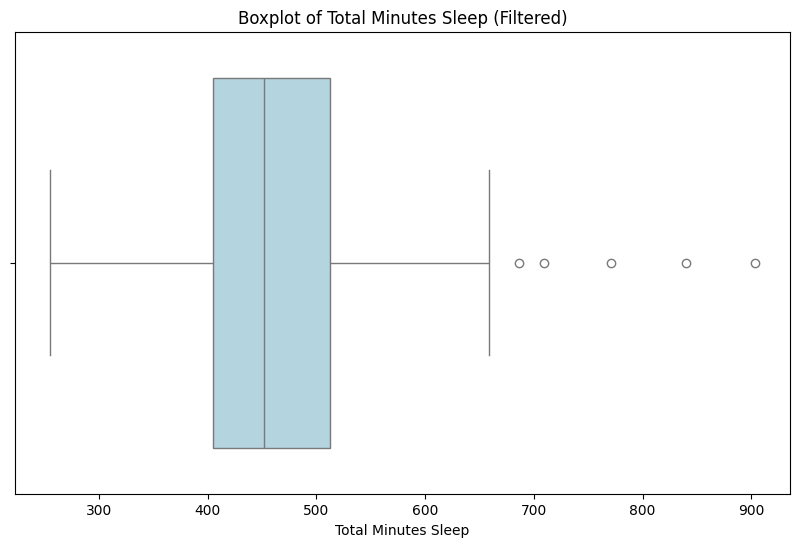

Removed 276 records with unrealistic sleep durations.


In [10]:
minutes_limit = 240 # 4 hours

df_sleep_clean = df_merged[(df_merged['TotalMinutesSleep'] > minutes_limit) & (df_merged['TotalMinutesSleep'] < 1440)] #filtering unrealistic sleep durations


plt.figure(figsize=(10, 6))
sns.boxplot (x='TotalMinutesSleep', data=df_sleep_clean, color='lightblue')
plt.title('Boxplot of Total Minutes Sleep (Filtered)')
plt.xlabel('Total Minutes Sleep')
plt.savefig('../visualizations/boxplot_total_minutes_sleep.png')
plt.show()



cleaned =  len(df_merged) - len(df_sleep_clean)
print (f"Removed {cleaned} records with unrealistic sleep durations.")


I filtered the dataset to focus on typical full-night sleep durations. The boxplot suggests that the central 50% of observations fall roughly between ~400 and ~510 minutes (≈6.7–8.5 hours), with a median around ~7.5 hours. A small number of observations appear as high-end outliers (≈11–15 hours). These may reflect genuine long sleep episodes (e.g., weekends or recovery) but can also be wearable-recording artifacts, so they should be treated cautiously in downstream analysis.

## Outliers of steps 

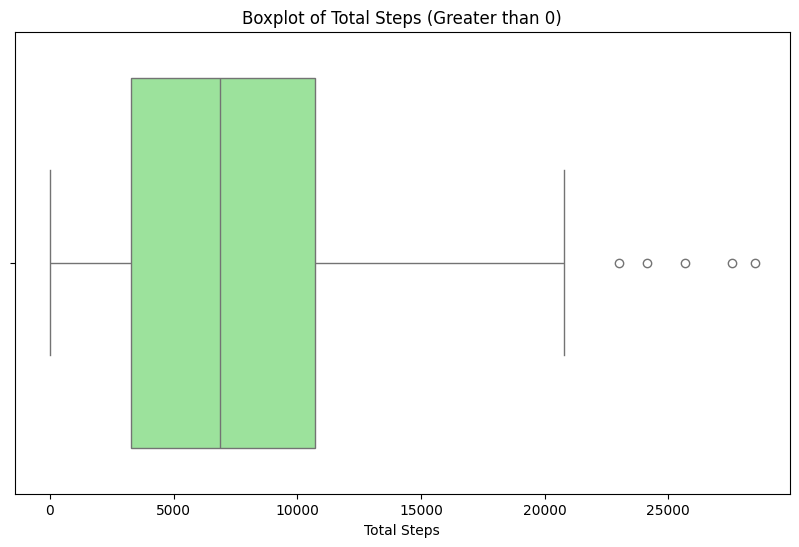

In [13]:
plt.figure (figsize = (10,6))

real_steps = df_merged[df_merged['TotalSteps'] > 0]

sns.boxplot (x='TotalSteps', data=real_steps, color='lightgreen')
plt.title('Boxplot of Total Steps (Greater than 0)')
plt.xlabel('Total Steps')
plt.savefig('../visualizations/boxplot_total_steps.png')
plt.show()

I ran a filtered analysis of daily step counts to describe user activity levels. The distribution is right-skewed: the central 50% of observations fall roughly between ~4,000 and ~10,000 steps, with a median around ~6,000–7,000 steps. A small number of observations appear as high-end outliers (~23,000–29,000 steps), indicating occasional very active days or a subset of highly active users. These extremes may be genuine, but they can also reflect tracking variability, so I treat them cautiously in subsequent analyses.

In [14]:
df_merged.to_csv("../data/processed/cleaned_smart_device_data.csv", index=False)
print ("It`s done! Cleaned data saved to '../data/processed/cleaned_smart_device_data.csv'")

It`s done! Cleaned data saved to '../data/processed/cleaned_smart_device_data.csv'
